In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd

df = pd.read_csv("/content/gdrive/MyDrive/DL/Smart City Traffic Patterns /archive/train_aWnotuB.csv")
df

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224


In [3]:
import numpy as np
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


EDA

In [4]:
df.isnull().sum()

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

In [5]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48115    False
48116    False
48117    False
48118    False
48119    False
Length: 48120, dtype: bool

In [6]:
df = df.drop_duplicates()
df

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224


In [7]:
df.shape

(48120, 4)

In [8]:
df.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [9]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

df['Date'] = df['DateTime'].dt.date
df['Time'] = df['DateTime'].dt.time

df['Date'] = df['Date'].astype(str)
df['Time'] = df['Time'].astype(str)

In [10]:
df = df.drop('DateTime', axis = 1)

In [11]:
df

,Junction,Vehicles,ID,Date,Time
0,1,15,20151101001,2015-11-01,00:00:00
1,1,13,20151101011,2015-11-01,01:00:00
2,1,10,20151101021,2015-11-01,02:00:00
3,1,7,20151101031,2015-11-01,03:00:00
4,1,9,20151101041,2015-11-01,04:00:00
...,...,...,...,...,...
48115,4,11,20170630194,2017-06-30,19:00:00
48116,4,30,20170630204,2017-06-30,20:00:00
48117,4,16,20170630214,2017-06-30,21:00:00
48118,4,22,20170630224,2017-06-30,22:00:00


In [12]:
df['Date'] = pd.to_datetime(df['Date'])

df['DayOfWeek'] = df['Date'].dt.dayofweek

df['Month'] = df['Date'].dt.month

df['Year'] = df['Date'].dt.year

In [13]:
df.head()

,Junction,Vehicles,ID,Date,Time,DayOfWeek,Month,Year
0,1,15,20151101001,2015-11-01,00:00:00,6,11,2015
1,1,13,20151101011,2015-11-01,01:00:00,6,11,2015
2,1,10,20151101021,2015-11-01,02:00:00,6,11,2015
3,1,7,20151101031,2015-11-01,03:00:00,6,11,2015
4,1,9,20151101041,2015-11-01,04:00:00,6,11,2015


In [14]:
df.tail()

,Junction,Vehicles,ID,Date,Time,DayOfWeek,Month,Year
48115,4,11,20170630194,2017-06-30,19:00:00,4,6,2017
48116,4,30,20170630204,2017-06-30,20:00:00,4,6,2017
48117,4,16,20170630214,2017-06-30,21:00:00,4,6,2017
48118,4,22,20170630224,2017-06-30,22:00:00,4,6,2017
48119,4,12,20170630234,2017-06-30,23:00:00,4,6,2017


In [15]:
import holidays
df['Date'] = pd.to_datetime(df['Date'])

indian_holidays = holidays.India(years=df['Date'].dt.year.unique())

# Custom function to check if the date is a holiday in India
def is_holiday_in_india(date):
    return date in indian_holidays

# Apply the custom function to the 'Date' column
df['IsHoliday'] = df['Date'].apply(lambda x: is_holiday_in_india(x))

In [16]:
df.head()

,Junction,Vehicles,ID,Date,Time,DayOfWeek,Month,Year,IsHoliday
0,1,15,20151101001,2015-11-01,00:00:00,6,11,2015,False
1,1,13,20151101011,2015-11-01,01:00:00,6,11,2015,False
2,1,10,20151101021,2015-11-01,02:00:00,6,11,2015,False
3,1,7,20151101031,2015-11-01,03:00:00,6,11,2015,False
4,1,9,20151101041,2015-11-01,04:00:00,6,11,2015,False


In [17]:
df['IsHoliday'].unique()

array([False,  True])

In [18]:
# Removing unnecessary columns

df = df.drop(['ID'], axis = 1)
df.head()

,Junction,Vehicles,Date,Time,DayOfWeek,Month,Year,IsHoliday
0,1,15,2015-11-01,00:00:00,6,11,2015,False
1,1,13,2015-11-01,01:00:00,6,11,2015,False
2,1,10,2015-11-01,02:00:00,6,11,2015,False
3,1,7,2015-11-01,03:00:00,6,11,2015,False
4,1,9,2015-11-01,04:00:00,6,11,2015,False


In [19]:
# Visualization

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"

In [20]:
fig = px.line(df, x='Date', y='Vehicles', title='Traffic Volume over Time')
fig.show()

In [21]:
# Grouping by Junction and looking at the statistical measures
junction_stats = df.groupby('Junction')['Vehicles'].describe()
print(junction_stats)

            count       mean        std  min   25%   50%   75%    max
Junction                                                             
1         14592.0  45.052906  23.008345  5.0  27.0  40.0  59.0  156.0
2         14592.0  14.253221   7.401307  1.0   9.0  13.0  17.0   48.0
3         14592.0  13.694010  10.436005  1.0   7.0  11.0  18.0  180.0
4          4344.0   7.251611   3.521455  1.0   5.0   7.0   9.0   36.0


Visualization

**Bar plot for junction**

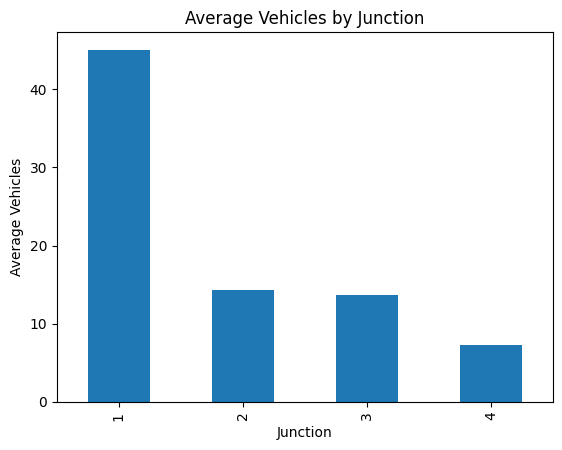

In [22]:
import matplotlib.pyplot as plt
df.groupby('Junction')['Vehicles'].mean().plot(kind='bar')
plt.xlabel('Junction')
plt.ylabel('Average Vehicles')
plt.title('Average Vehicles by Junction')
plt.show()

**Box plot for IsHoliday**

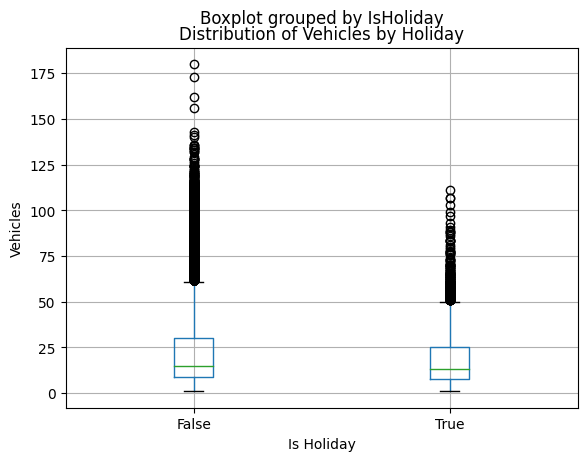

In [23]:
df.boxplot(column='Vehicles', by='IsHoliday')
plt.xlabel('Is Holiday')
plt.ylabel('Vehicles')
plt.title('Distribution of Vehicles by Holiday')
plt.show()

**Hypothesis Testing : t-test**

In [24]:
from scipy.stats import ttest_ind

junction_1 = df[df['Junction'] == 1]['Vehicles']
junction_2 = df[df['Junction'] == 2]['Vehicles']

t_stat, p_value = ttest_ind(junction_1, junction_2)
print(f"t-statistic: {t_stat}, p-value: {p_value}")

t-statistic: 153.93470815373487, p-value: 0.0


This signifies that the t-statistic of 153.93 indicates a substantial difference between the average number of vehicles for the two junctions.

A p-value of 0.0 indicates an extremely low probability of observing the data under the assumption that there is no difference between the means of the two groups, suggesting that the null hypothesis can be rejected.

# Feature Engineering

## Creating lag features to capture any time-dependant features

In [25]:
df['PreviousDayVehicles'] = df['Vehicles'].shift(24)
df['PreviousHourVehicles'] = df['Vehicles'].shift(1)

In [26]:
df.head()

,Junction,Vehicles,Date,Time,DayOfWeek,Month,Year,IsHoliday,PreviousDayVehicles,PreviousHourVehicles
0,1,15,2015-11-01,00:00:00,6,11,2015,False,NaN,NaN
1,1,13,2015-11-01,01:00:00,6,11,2015,False,NaN,15.0
2,1,10,2015-11-01,02:00:00,6,11,2015,False,NaN,13.0
3,1,7,2015-11-01,03:00:00,6,11,2015,False,NaN,10.0
4,1,9,2015-11-01,04:00:00,6,11,2015,False,NaN,7.0


In [27]:
df.isnull().sum()

Junction                 0
Vehicles                 0
Date                     0
Time                     0
DayOfWeek                0
Month                    0
Year                     0
IsHoliday                0
PreviousDayVehicles     24
PreviousHourVehicles     1
dtype: int64

In [28]:
df['PreviousDayVehicles'].fillna(0,inplace = True)
df['PreviousHourVehicles'].fillna(0,inplace = True)
df.head()

,Junction,Vehicles,Date,Time,DayOfWeek,Month,Year,IsHoliday,PreviousDayVehicles,PreviousHourVehicles
0,1,15,2015-11-01,00:00:00,6,11,2015,False,0.0,0.0
1,1,13,2015-11-01,01:00:00,6,11,2015,False,0.0,15.0
2,1,10,2015-11-01,02:00:00,6,11,2015,False,0.0,13.0
3,1,7,2015-11-01,03:00:00,6,11,2015,False,0.0,10.0
4,1,9,2015-11-01,04:00:00,6,11,2015,False,0.0,7.0


# Splitting the Data:

In [29]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, shuffle=False)

# Printing the sizes of the training and testing sets
print(f"Training set size: {len(train_df)}")
print(f"Testing set size: {len(test_df)}")

Training set size: 38496
Testing set size: 9624


# Modeling and Evaluation

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(target.index, target.values, label='Historical Traffic', color='b')
plt.plot(train_forecast_df.index, train_forecast_df['Vehicles'], label='Forecasted Traffic', color='r')
plt.xlabel('Time')
plt.ylabel('Traffic (Vehicles)')
plt.title('Historical and Forecasted Traffic Patterns for the Training Set')
plt.legend()
plt.show()

NameError: name 'target' is not defined

<Figure size 1200x600 with 0 Axes>

# Transitioning to LSTM

In [31]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [32]:
df.head()

,Junction,Vehicles,Date,Time,DayOfWeek,Month,Year,IsHoliday,PreviousDayVehicles,PreviousHourVehicles
0,1,15,2015-11-01,00:00:00,6,11,2015,False,0.0,0.0
1,1,13,2015-11-01,01:00:00,6,11,2015,False,0.0,15.0
2,1,10,2015-11-01,02:00:00,6,11,2015,False,0.0,13.0
3,1,7,2015-11-01,03:00:00,6,11,2015,False,0.0,10.0
4,1,9,2015-11-01,04:00:00,6,11,2015,False,0.0,7.0


In [33]:
from sklearn.preprocessing import MinMaxScaler

# Converting 'Vehicles' column to float
df['Vehicles'] = df['Vehicles'].astype(float)

# Normalizing 'Vehicles' column using MinMaxScaler
scaler = MinMaxScaler()
df[['Vehicles']] = scaler.fit_transform(df[['Vehicles']])

In [34]:
df.head()

,Junction,Vehicles,Date,Time,DayOfWeek,Month,Year,IsHoliday,PreviousDayVehicles,PreviousHourVehicles
0,1,0.078212,2015-11-01,00:00:00,6,11,2015,False,0.0,0.0
1,1,0.067039,2015-11-01,01:00:00,6,11,2015,False,0.0,15.0
2,1,0.050279,2015-11-01,02:00:00,6,11,2015,False,0.0,13.0
3,1,0.033520,2015-11-01,03:00:00,6,11,2015,False,0.0,10.0
4,1,0.044693,2015-11-01,04:00:00,6,11,2015,False,0.0,7.0


In [35]:
df.dtypes

Junction                         int64
Vehicles                       float64
Date                    datetime64[ns]
Time                            object
DayOfWeek                        int32
Month                            int32
Year                             int32
IsHoliday                         bool
PreviousDayVehicles            float64
PreviousHourVehicles           float64
dtype: object

In [36]:
# Convert the 'Date' column to numeric features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour

# Drop the original 'Date' column since it's no longer needed
df.drop(columns=['Date'], inplace=True)

# Check if all columns are now numeric
print(df.dtypes)

Junction                  int64
Vehicles                float64
Time                     object
DayOfWeek                 int32
Month                     int32
Year                      int32
IsHoliday                  bool
PreviousDayVehicles     float64
PreviousHourVehicles    float64
Day                       int32
Hour                      int32
dtype: object


In [37]:
# Convert 'IsHoliday' column to numeric format
df['IsHoliday'] = df['IsHoliday'].astype(int)

In [38]:
df.head()

,Junction,Vehicles,Time,DayOfWeek,Month,Year,IsHoliday,PreviousDayVehicles,PreviousHourVehicles,Day,Hour
0,1,0.078212,00:00:00,6,11,2015,0,0.0,0.0,1,0
1,1,0.067039,01:00:00,6,11,2015,0,0.0,15.0,1,0
2,1,0.050279,02:00:00,6,11,2015,0,0.0,13.0,1,0
3,1,0.033520,03:00:00,6,11,2015,0,0.0,10.0,1,0
4,1,0.044693,04:00:00,6,11,2015,0,0.0,7.0,1,0


In [39]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GRU, Bidirectional

sequence_length = 24

X_columns = ['Junction', 'Vehicles', 'DayOfWeek', 'Month', 'Year', 'IsHoliday',
             'PreviousDayVehicles', 'PreviousHourVehicles']
y_column = 'Vehicles'

# Splitting the data into input sequences (X) and labels (y)
X = []
y = []

data_array = df.values

data_array = df[X_columns + [y_column]].values

for i in range(len(data_array) - sequence_length):
    X.append(data_array[i:i + sequence_length, :-1])  # Exclude last column
    y.append(data_array[i + sequence_length, -1])  # Last column is target 'Vehicles'

X = np.array(X)
y = np.array(y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Building the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model on the training data
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
962/962 [==============================] - 12s 9ms/step - loss: 0.0145 - val_loss: 0.0140
Epoch 2/100
962/962 [==============================] - 7s 7ms/step - loss: 0.0138 - val_loss: 0.0136
Epoch 3/100
962/962 [==============================] - 8s 8ms/step - loss: 0.0138 - val_loss: 0.0138
Epoch 4/100
962/962 [==============================] - 7s 7ms/step - loss: 0.0137 - val_loss: 0.0137
Epoch 5/100
962/962 [==============================] - 8s 8ms/step - loss: 0.0136 - val_loss: 0.0137
Epoch 6/100
962/962 [==============================] - 7s 7ms/step - loss: 0.0136 - val_loss: 0.0136
Epoch 7/100
962/962 [==============================] - 8s 8ms/step - loss: 0.0065 - val_loss: 0.0028
Epoch 8/100
962/962 [==============================] - 6s 7ms/step - loss: 0.0028 - val_loss: 0.0034
Epoch 9/100
962/962 [==============================] - 8s 9ms/step - loss: 0.0023 - val_loss: 0.0020
Epoch 10/100
962/962 [==============================] - 7s 7ms/step - loss: 0.0018 - val_l

In [42]:
# Evaluation

loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Compare with training loss
train_loss = model.evaluate(X_train, y_train)
print(f"Training Loss: {train_loss}")

301/301 [==============================] - 1s 4ms/step - loss: 6.7475e-04
Test Loss: 0.0006747450097464025
1203/1203 [==============================] - 5s 4ms/step - loss: 6.7513e-04
Training Loss: 0.0006751305190846324


In [43]:
y_pred = model.predict(X_test)

# Reshaping y_pred to a 2D array with shape (num_samples, 1)
y_pred = y_pred.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)


# Inverse transforming the predicted values to their original scale (if needed)
y_pred_original = scaler.inverse_transform(y_pred)

# Inverse transforming the actual test target values (y_test) to their original scale
y_test_original = scaler.inverse_transform(y_test)

301/301 [==============================] - 1s 3ms/step


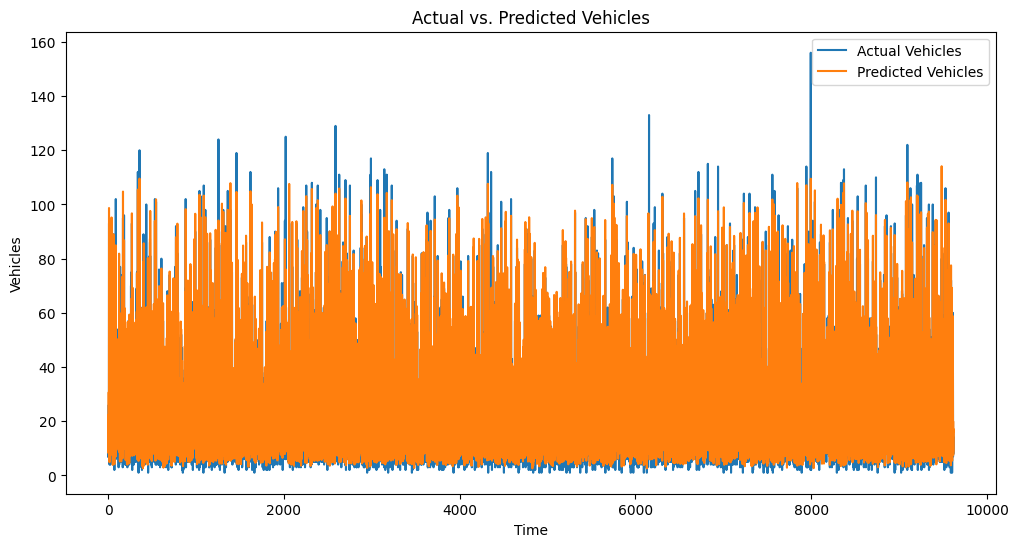

In [44]:
# Visualizing the results:

# Plotting the actual 'Vehicles' values against the predicted values for the test dataset
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Actual Vehicles')
plt.plot(y_pred_original, label='Predicted Vehicles')
plt.xlabel('Time')
plt.ylabel('Vehicles')
plt.title('Actual vs. Predicted Vehicles')
plt.legend()
plt.show()

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test_original, y_pred_original)
mse = mean_squared_error(y_test_original, y_pred_original)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 3.290733502808331
Mean Squared Error (MSE): 21.61951583503171
Root Mean Squared Error (RMSE): 4.649679110974402


In [46]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test_original,y_pred_original)
print(R2)

0.9482585324468569


In conclusion, the LSTM model demonstrates strong predictive capabilities for traffic forecasting. Its accurate predictions and low error metrics make it a valuable tool for traffic management and infrastructure planning in smart cities. However, it's essential to continue monitoring and refining the model regularly to ensure it maintains its accuracy over time and adapts to any changes in traffic patterns or other factors affecting traffic.

**GRU Model**

In [47]:
# Building the LSTM model
model_gru = Sequential()
model_gru.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_gru.add(GRU(units=50))
model_gru.add(Dense(units=1))

# Compiling the model
model_gru.compile(optimizer='adam', loss='mean_squared_error')

# Training the model on the training data
model_gru.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
962/962 [==============================] - 11s 8ms/step - loss: 0.0148 - val_loss: 0.0137
Epoch 2/100
962/962 [==============================] - 6s 6ms/step - loss: 0.0146 - val_loss: 0.0152
Epoch 3/100
962/962 [==============================] - 7s 7ms/step - loss: 0.0142 - val_loss: 0.0140
Epoch 4/100
962/962 [==============================] - 7s 7ms/step - loss: 0.0142 - val_loss: 0.0137
Epoch 5/100
962/962 [==============================] - 7s 7ms/step - loss: 0.0143 - val_loss: 0.0137
Epoch 6/100
962/962 [==============================] - 7s 7ms/step - loss: 0.0141 - val_loss: 0.0149
Epoch 7/100
962/962 [==============================] - 6s 7ms/step - loss: 0.0139 - val_loss: 0.0145
Epoch 8/100
962/962 [==============================] - 7s 7ms/step - loss: 0.0140 - val_loss: 0.0144
Epoch 9/100
962/962 [==============================] - 6s 6ms/step - loss: 0.0139 - val_loss: 0.0140
Epoch 10/100
962/962 [==============================] - 7s 7ms/step - loss: 0.0139 - val_l

In [48]:
# Evaluation

loss = model_gru.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Compare with training loss
train_loss = model_gru.evaluate(X_train, y_train)
print(f"Training Loss: {train_loss}")

301/301 [==============================] - 2s 4ms/step - loss: 0.0130
Test Loss: 0.013043764047324657
1203/1203 [==============================] - 4s 3ms/step - loss: 0.0135
Training Loss: 0.013542638160288334


In [49]:
y_pred = model_gru.predict(X_test)

# Reshaping y_pred to a 2D array with shape (num_samples, 1)
y_pred = y_pred.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)


# Inverse transforming the predicted values to their original scale (if needed)
y_pred_original = scaler.inverse_transform(y_pred)

# Inverse transforming the actual test target values (y_test) to their original scale
y_test_original = scaler.inverse_transform(y_test)

301/301 [==============================] - 2s 4ms/step


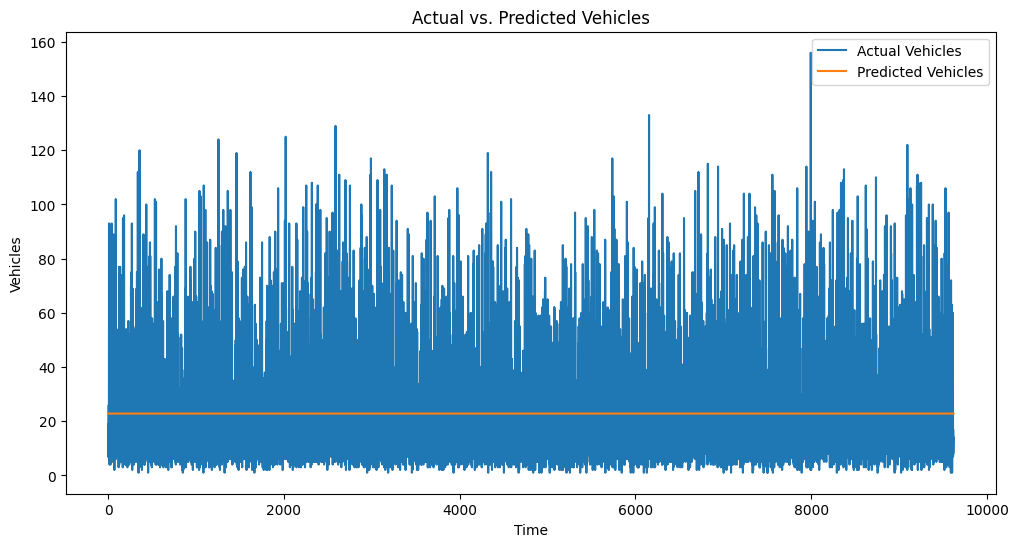

In [50]:
# Visualizing the results:

# Plotting the actual 'Vehicles' values against the predicted values for the test dataset
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Actual Vehicles')
plt.plot(y_pred_original, label='Predicted Vehicles')
plt.xlabel('Time')
plt.ylabel('Vehicles')
plt.title('Actual vs. Predicted Vehicles')
plt.legend()
plt.show()

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test_original, y_pred_original)
mse = mean_squared_error(y_test_original, y_pred_original)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 15.159714820925263
Mean Squared Error (MSE): 417.9352735256861
Root Mean Squared Error (RMSE): 20.4434653013056


In [52]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test_original,y_pred_original)
print(R2)

-0.00023444370587344388


# Analyzing Forecasted Traffic Patterns

## Plotting the Forecasted vs. Actual Traffic Counts

In [53]:
df['DateTime'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']])
df.head()

,Junction,Vehicles,Time,DayOfWeek,Month,Year,IsHoliday,PreviousDayVehicles,PreviousHourVehicles,Day,Hour,DateTime
0,1,0.078212,00:00:00,6,11,2015,0,0.0,0.0,1,0,2015-11-01
1,1,0.067039,01:00:00,6,11,2015,0,0.0,15.0,1,0,2015-11-01
2,1,0.050279,02:00:00,6,11,2015,0,0.0,13.0,1,0,2015-11-01
3,1,0.033520,03:00:00,6,11,2015,0,0.0,10.0,1,0,2015-11-01
4,1,0.044693,04:00:00,6,11,2015,0,0.0,7.0,1,0,2015-11-01


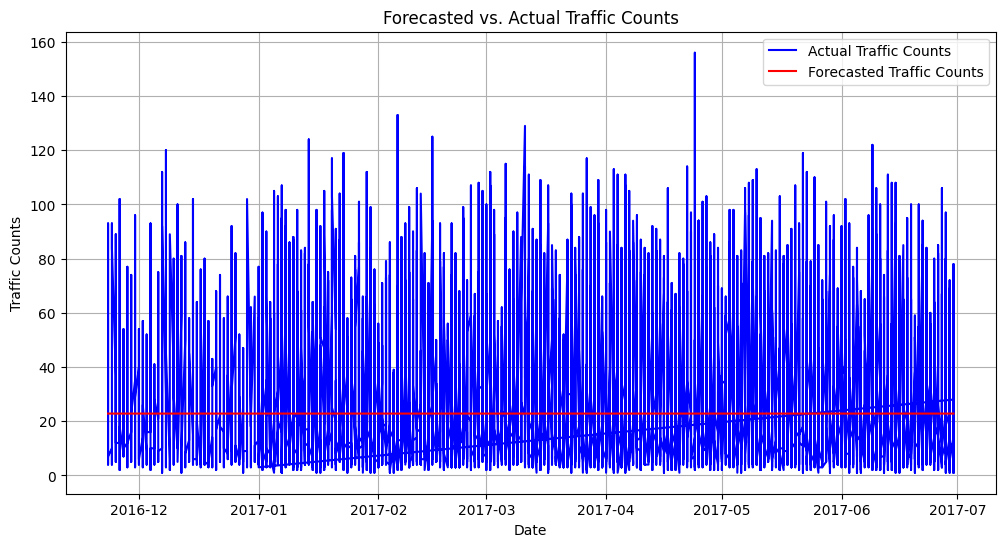

In [54]:
# Getting the timestamp for the test data
test_timestamps = df.iloc[-len(y_test_original):]['DateTime']

# Creating a figure and plot the actual traffic counts
plt.figure(figsize=(12, 6))
plt.plot(test_timestamps, y_test_original, label='Actual Traffic Counts', color='blue')

# Getting the timestamp for the forecasted data
forecasted_timestamps = df.iloc[-len(y_test_original):]['DateTime']

# Plotting the predicted traffic counts for the corresponding time period
plt.plot(forecasted_timestamps, y_pred_original, label='Forecasted Traffic Counts', color='red')

plt.xlabel('Date')
plt.ylabel('Traffic Counts')
plt.title('Forecasted vs. Actual Traffic Counts')
plt.legend()
plt.grid(True)
plt.show()

Since the predicted traffic counts only occupy a small part at the end of the graph, it indicates that the model's predictions are trailing the actual traffic counts for the test dataset.

## Visualizing Trends

This plot will help us identify any monthly trends in traffic.

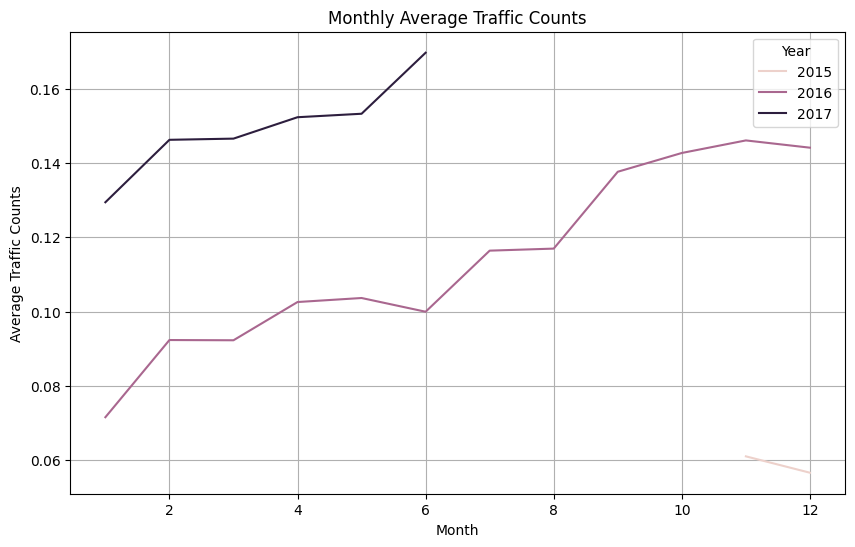

In [55]:
import seaborn as sns
# Extracting Year and Month from the DateTime column
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month

# Grouping the data by Year and Month and calculate the average traffic counts for each month
monthly_traffic = df.groupby(['Year', 'Month'])['Vehicles'].mean().reset_index()

# Plotting the average traffic counts by month
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Vehicles', hue='Year', data=monthly_traffic)
plt.xlabel('Month')
plt.ylabel('Average Traffic Counts')
plt.title('Monthly Average Traffic Counts')
plt.legend(title='Year', loc='upper right')
plt.grid(True)
plt.show()

## Analyzing Seasonal Variations

This plot with the seasonal decomposition will reveal the seasonal variations and recurring patterns in the forecasted data.

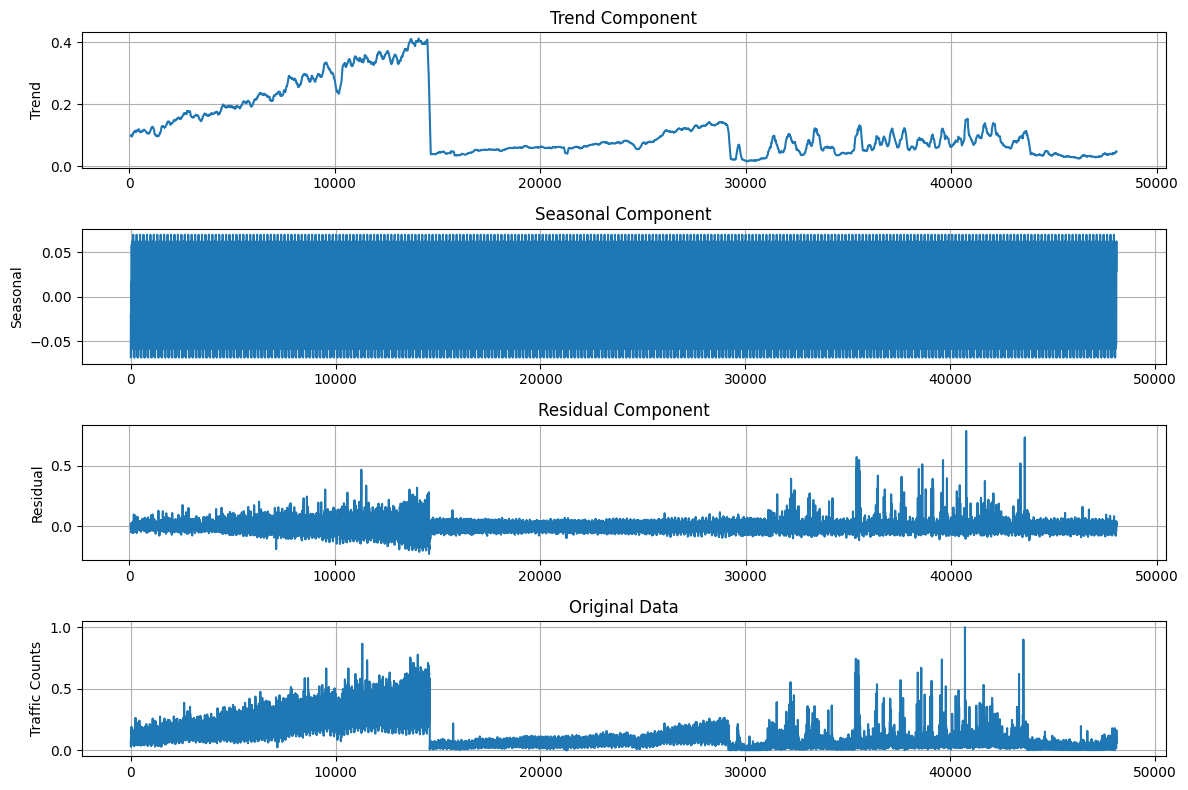

In [56]:
import statsmodels.api as sm

# Decomposing the time series into trend, seasonal, and residual components
decomposition = sm.tsa.seasonal_decompose(df['Vehicles'], model='additive', period=24*7)  # Assuming a weekly seasonality

# Plotting the components
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(decomposition.trend)
plt.ylabel('Trend')
plt.title('Trend Component')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(decomposition.seasonal)
plt.ylabel('Seasonal')
plt.title('Seasonal Component')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(decomposition.resid)
plt.ylabel('Residual')
plt.title('Residual Component')
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(df['Vehicles'])
plt.ylabel('Traffic Counts')
plt.title('Original Data')
plt.grid(True)

plt.tight_layout()
plt.show()


# Infrastructure Planning

## Design a Robust Traffic Management System

Designing a dynamic traffic management system that adapts to peak traffic hours and efficiently handles the increased load during those hours.

In [ ]:
df['HourOfDay'] = df['DateTime'].dt.hour
df.head()

,Junction,Vehicles,Time,DayOfWeek,Month,Year,IsHoliday,PreviousDayVehicles,PreviousHourVehicles,Day,Hour,DateTime,HourOfDay
0,1,0.078212,00:00:00,6,11,2015,0,0.0,0.0,1,0,2015-11-01,0
1,1,0.067039,01:00:00,6,11,2015,0,0.0,15.0,1,0,2015-11-01,0
2,1,0.050279,02:00:00,6,11,2015,0,0.0,13.0,1,0,2015-11-01,0
3,1,0.033520,03:00:00,6,11,2015,0,0.0,10.0,1,0,2015-11-01,0
4,1,0.044693,04:00:00,6,11,2015,0,0.0,7.0,1,0,2015-11-01,0


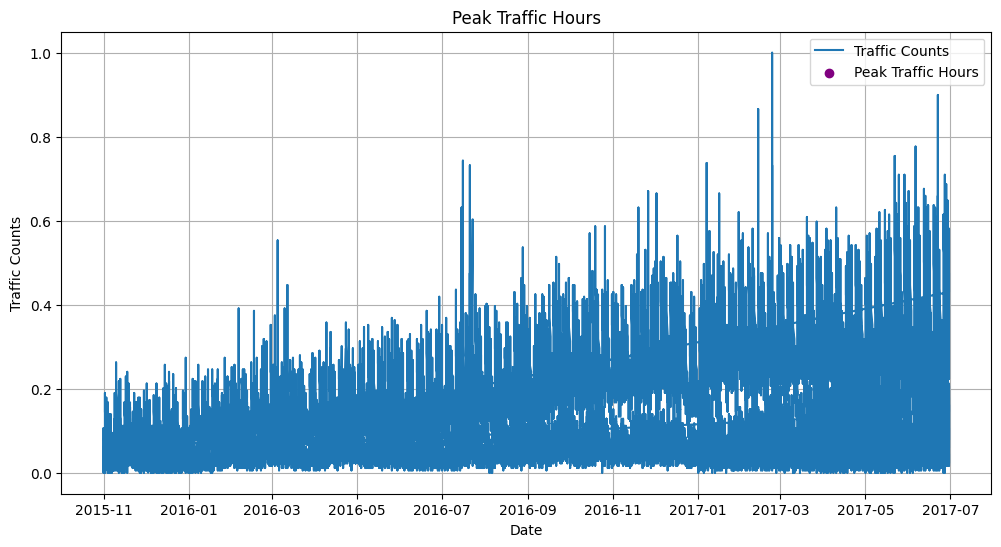

In [ ]:
peak_traffic_hours = df[(df['HourOfDay'] >= 7) & (df['HourOfDay'] <= 10)]  # Assumed peak traffic hours from 7 AM to 10 AM

# Visualize peak traffic hours
plt.figure(figsize=(12, 6))
plt.plot(df['DateTime'], df['Vehicles'], label='Traffic Counts')
plt.scatter(peak_traffic_hours['DateTime'], peak_traffic_hours['Vehicles'], color='purple', label='Peak Traffic Hours')
plt.xlabel('Date')
plt.ylabel('Traffic Counts')
plt.title('Peak Traffic Hours')
plt.legend()
plt.grid(True)
plt.show()